# VGG

- https://machinelearningmastery.com/how-to-implement-major-architecture-innovations-for-convolutional-neural-networks/
- https://www.researchgate.net/figure/llustration-of-the-network-architecture-of-VGG-19-model-conv-means-convolution-FC-means_fig2_325137356


In [12]:
# Example of creating a CNN model with a VGG block
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [13]:
mnist = tf.keras.datasets.mnist

(X_train_, y_train), (X_test_, y_test) = mnist.load_data()
X_train_, X_test_ = (
    X_train_.astype(np.float32) / 255.0,
    X_test_.astype(np.float32) / 255.0,
)

# Add another dimension
X_train = X_train_[..., np.newaxis]
X_test = X_test_[..., np.newaxis]
print(X_train.shape)
print(X_test.shape)

# Reduce dimension size
np.random.seed(0)

REDUCE_DIM = 2000
idx = np.random.permutation(REDUCE_DIM)

X_train = X_train[idx]
y_train = y_train[idx]
X_test = X_test[idx]
y_test = y_test[idx]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [16]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

In [17]:
# function for creating a vgg block
def vgg_block(layer_in, n_filters, n_conv):
    # add convolutional layers
    for _ in range(n_conv):
        layer_in = Conv2D(n_filters, (3, 3), padding="same", activation="relu")(
            layer_in
        )
    # add max pooling layer
    layer_in = MaxPooling2D((2, 2), strides=(2, 2))(layer_in)
    return layer_in

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 64)      0         
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


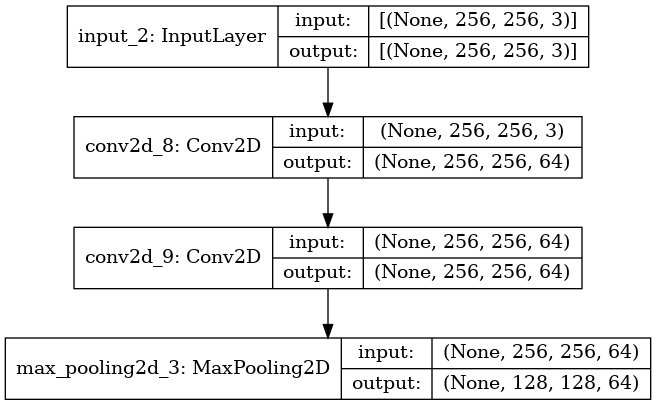

In [18]:
# define model input
visible = Input(shape=(256, 256, 3))
# add vgg module
layer = vgg_block(visible, 64, 2)
# create model
model = Model(inputs=visible, outputs=layer)
# summarize model
model.summary()
# plot model architecture
plot_model(model, show_shapes=True, to_file="vgg_block.png")

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0     

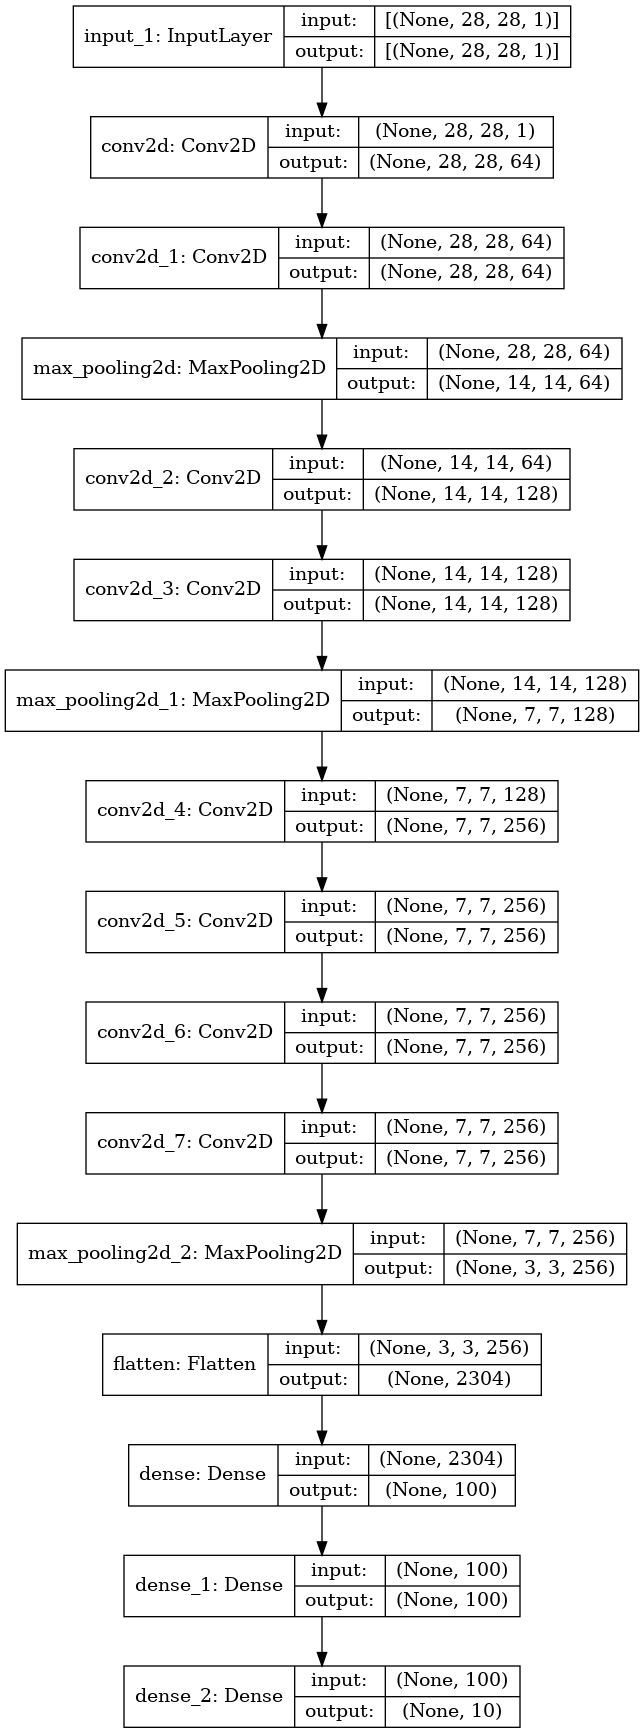

In [21]:
tf.keras.backend.clear_session()
# define model input
visible = Input(shape=(28, 28, 1))
# add vgg module
layer = vgg_block(visible, 64, 2)
# add vgg module
layer = vgg_block(layer, 128, 2)
# add vgg module
layer = vgg_block(layer, 256, 4)
# Flatten
layer = Flatten()(layer)

layer = Dense(100, activation="relu")(layer)
layer = Dense(100, activation="relu")(layer)
layer = Dense(10, activation="softmax")(layer)

# create model
model = Model(inputs=visible, outputs=layer)
# summarize model
model.summary()
# plot model architecture
plot_model(model, show_shapes=True, to_file="multiple_vgg_blocks.png")

In [22]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"],
)  # same as `tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')`

In [23]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

2021-09-21 20:33:11.982513: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-21 20:33:12.004685: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3593110000 Hz


Epoch 1/20
57/57 [==============================] - 12s 205ms/step - loss: 2.3040 - accuracy: 0.0779 - val_loss: 2.2970 - val_accuracy: 0.1050
Epoch 2/20
57/57 [==============================] - 10s 175ms/step - loss: 2.2727 - accuracy: 0.1252 - val_loss: 1.2691 - val_accuracy: 0.6150
Epoch 3/20
57/57 [==============================] - 10s 174ms/step - loss: 1.0904 - accuracy: 0.6432 - val_loss: 0.6023 - val_accuracy: 0.8100
Epoch 4/20
57/57 [==============================] - 10s 176ms/step - loss: 0.4697 - accuracy: 0.8562 - val_loss: 0.3726 - val_accuracy: 0.8850
Epoch 5/20
57/57 [==============================] - 9s 166ms/step - loss: 0.2856 - accuracy: 0.9115 - val_loss: 0.4252 - val_accuracy: 0.8800
Epoch 6/20
57/57 [==============================] - 11s 186ms/step - loss: 0.2401 - accuracy: 0.9231 - val_loss: 0.3975 - val_accuracy: 0.9350
Epoch 7/20
57/57 [==============================] - 10s 185ms/step - loss: 0.1136 - accuracy: 0.9602 - val_loss: 0.2280 - val_accuracy: 0.9300


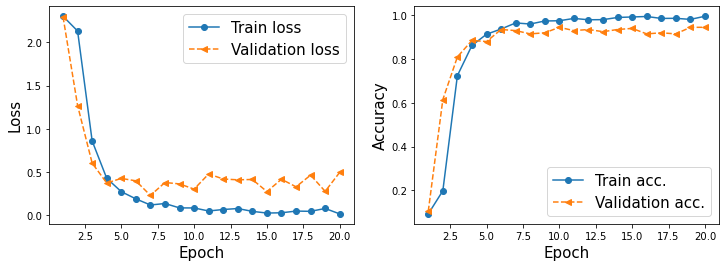

In [24]:
hist = history.history
x_arr = np.arange(len(hist["loss"])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist["loss"], "-o", label="Train loss")
ax.plot(x_arr, hist["val_loss"], "--<", label="Validation loss")
ax.set_xlabel("Epoch", size=15)
ax.set_ylabel("Loss", size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist["accuracy"], "-o", label="Train acc.")
ax.plot(x_arr, hist["val_accuracy"], "--<", label="Validation acc.")
ax.legend(fontsize=15)
ax.set_xlabel("Epoch", size=15)
ax.set_ylabel("Accuracy", size=15)

# plt.savefig('figures/15_12.png', dpi=300)
plt.show()

In [25]:
test_results = model.evaluate(X_test, y_test)
print("\nTest Acc. {:.2f}%".format(test_results[1] * 100))

63/63 [==============================] - 5s 81ms/step - loss: 0.3375 - accuracy: 0.9375

Test Acc. 93.75%


In [26]:
# Find misclassification
y_pred_tf = model(X_test)
y_pred_tf.numpy().shape

y_pred = tf.math.argmax(y_pred_tf, axis=1).numpy()
print(y_pred.shape)
print(y_test.shape)

loc = y_pred != y_test
print(f"Missclassification = {loc.sum()}")

(2000,)
(2000,)
Missclassification = 125


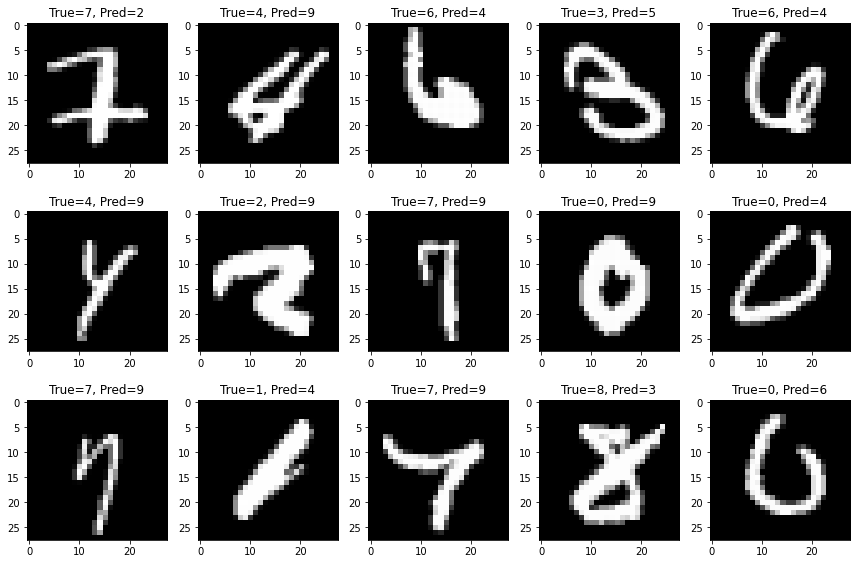

In [27]:
fig, axes2D = plt.subplots(3, 5, figsize=(12, 8))
axes = list(itertools.chain.from_iterable(axes2D))  # Flatten 2D list
X_test_miss = X_test[loc]
y_test_miss = y_test[loc]
y_pred_miss = y_pred[loc]
for idx, ax in enumerate(axes):
    ax.imshow(X_test_miss[idx], cmap="gray")
    ax.set_title(f"True={y_test_miss[idx]}, Pred={y_pred_miss[idx]}")
fig.tight_layout()
plt.show()